In [3]:
import numpy as np #import numpy
import pandas as pd #import pandas

In [4]:
power = pd.read_csv('/content/intro_ml_workshop_dataset.csv') #อ่านข้อมูลจาก CSV

In [8]:
power.head(10) #ดูว่าข้อมูลเรียงยังไง

,ds,power,wetbulb_temperature,humidity
0,2023-06-27 17:08:00,2088.999031,88.385,67.695832
1,2023-06-27 17:09:00,2089.850510,88.460,68.916667
2,2023-06-27 17:10:00,2086.172455,88.295,68.816667
3,2023-06-27 17:11:00,2091.607552,88.280,69.025000
4,2023-06-27 17:12:00,2085.903702,87.905,68.279167
5,2023-06-27 17:13:00,2088.569633,87.605,67.825000
6,2023-06-27 17:14:00,2091.599823,87.425,67.887499
7,2023-06-27 17:15:00,2084.092529,87.815,69.137497
8,2023-06-27 17:16:00,2094.517464,87.680,68.858333
9,2023-06-27 17:17:00,2083.337418,87.425,68.749999


In [9]:
power.info() #check if any null space in the data file for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47622 entries, 0 to 47621
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ds                   47622 non-null  object 
 1   power                47622 non-null  float64
 2   wetbulb_temperature  43269 non-null  float64
 3   humidity             47608 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [14]:
power_nonnull = power.dropna().drop_duplicates() #vanish the replication row and null

In [15]:
power_nonnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43255 entries, 0 to 47621
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ds                   43255 non-null  object 
 1   power                43255 non-null  float64
 2   wetbulb_temperature  43255 non-null  float64
 3   humidity             43255 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.7+ MB


In [16]:
import matplotlib.pyplot as plt #import library for ploting
import seaborn as sns

<Axes: xlabel='humidity', ylabel='power'>

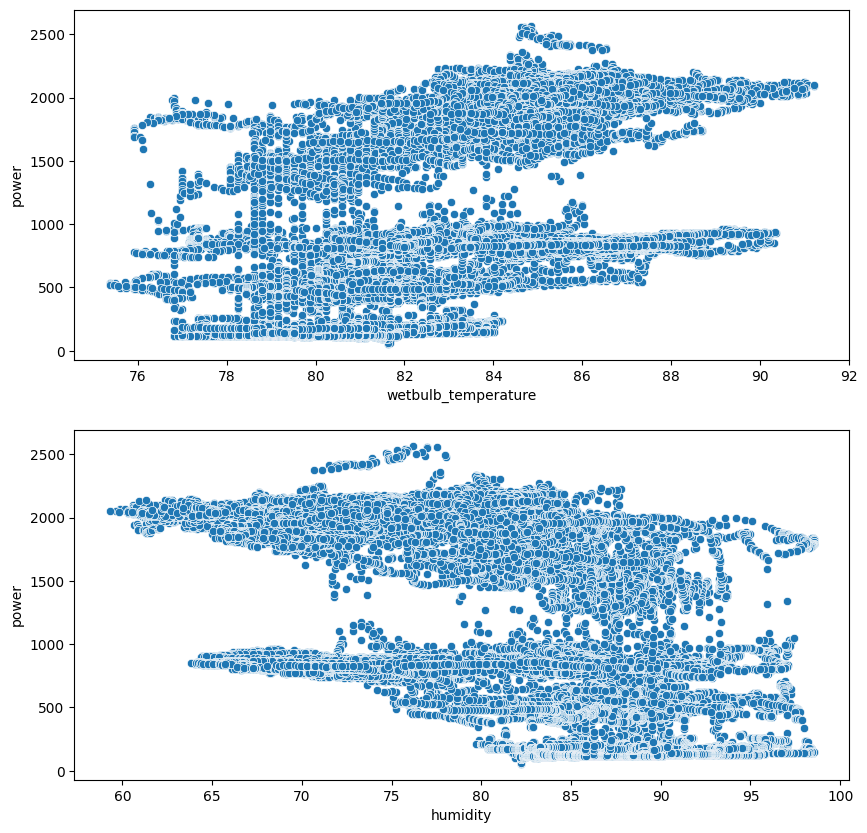

In [18]:
fig, (ax0,ax1) = plt.subplots(nrows=2,sharey=True,figsize=(10,10)) #plot data for seeing trend for each data

sns.scatterplot(power_nonnull,x='wetbulb_temperature',y='power',ax=ax0)
sns.scatterplot(power_nonnull,x='humidity',y='power',ax=ax1)

In [23]:
from sklearn.linear_model import LinearRegression #import linear model
from sklearn.model_selection import train_test_split #import library for setting train and test

X = power_nonnull[['wetbulb_temperature','humidity']]
y = power_nonnull['power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg = LinearRegression() #assign linear model
reg.fit(X_train, y_train) #fit the model to data

reg.score(X_test, y_test) #evaluate model

0.387970290850281